# Note: Data Science Handbook

## Matplotlib

### 基础

绘图使用 jupyter notebook，绘制、显示、调试较为方便。在文件开头开启 `%matplotlib inline` 后，每个 cell 中的图均可于下方显示。所有绘图操作可通过 `matplotlib.pyplot` 模块实现，一般将其 import 为 `plt`。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

绘制之前，可指定绘图主题，默认主题并不好看。Matplotlib 有很多可用的主题如下。

In [2]:
print(', '.join(plt.style.available))

seaborn-dark, seaborn-darkgrid, seaborn-ticks, fivethirtyeight, seaborn-whitegrid, classic, _classic_test, fast, seaborn-talk, seaborn-dark-palette, seaborn-bright, seaborn-pastel, grayscale, seaborn-notebook, ggplot, seaborn-colorblind, seaborn-muted, seaborn, Solarize_Light2, seaborn-paper, bmh, tableau-colorblind10, seaborn-white, dark_background, seaborn-poster, seaborn-deep


我们选择一个相对更加现代的主题，选择 Times New Roman 字体，然后调用 `plt.plot` 方法绘制简单的函数曲线：

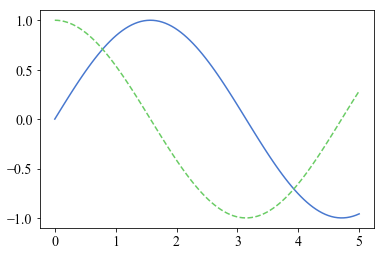

In [3]:
plt.style.use('seaborn-muted')
plt.rc('font', family='Times New Roman', size=14)
x = np.linspace(0, 5, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x), '--');

Matplotlib 的最重要的对象是 `Figure` 和 `Axes`，这两者的关系如下图：

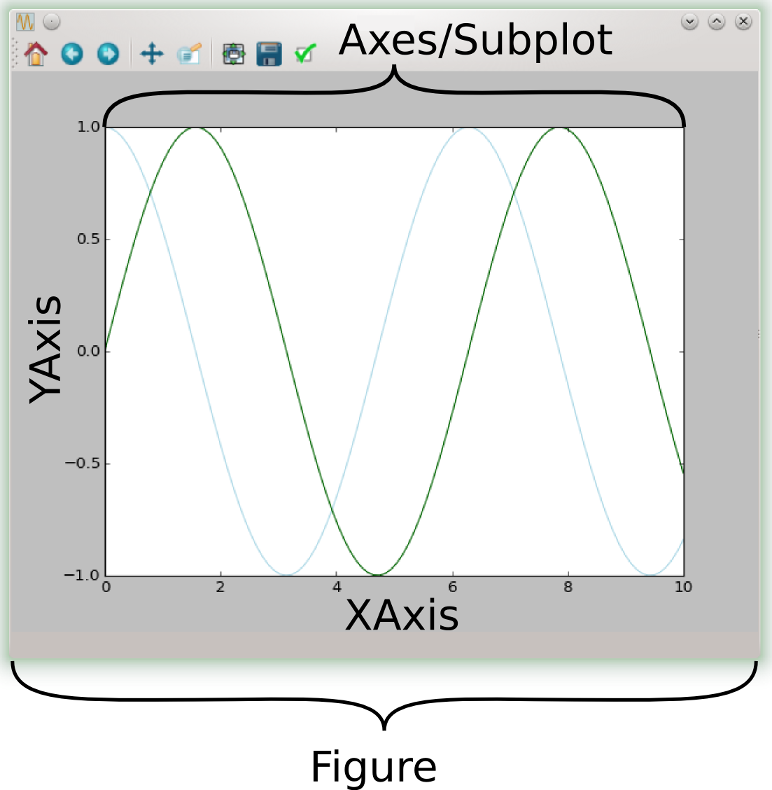

据此我们可以合理推断，一个 `Figure` 可以有多个子图或 `Axes`。关于整个画布的操作实现为 `Figure` 的方法，而绘图则实现为 `Axes` 的方法。下面是一个多子图绘制的例子：

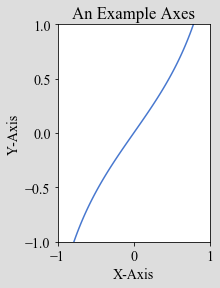

In [4]:
x = np.linspace(-1, 1, 100)
y = np.tan(x)

fig = plt.figure()
fig.set_facecolor('#DDDDDD')  # set figure-wise properties (background color here) with figure methods
ax1 = fig.add_subplot(121)  # 1 row and 2 column, get first subplot
ax1.set(xlim=[-1, 1], ylim=[-1, 1], title='An Example Axes',
        ylabel='Y-Axis', xlabel='X-Axis');  # set axes-wise properties with axes methods
ax1.plot(x, y)

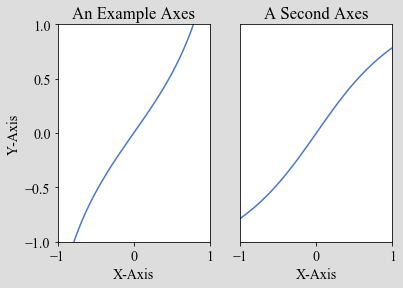

In [5]:
ax2 = fig.add_subplot(122, sharey=ax1)
ax2.set(xlim=[-1, 1], title='A Second Axes', xlabel='X-Axis')
ax2.plot(y, x)

# just too boring here
for label in ax2.get_yticklabels():
    label.set_visible(False)
for line in ax2.get_yticklines():
    line.set_visible(False)
    
fig

或者直接简单地：

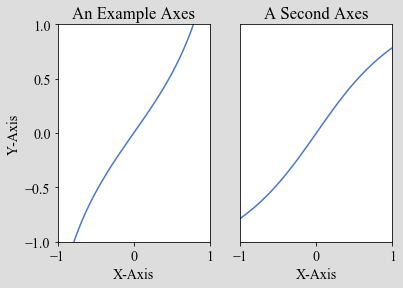

In [6]:
fig, ax = plt.subplots(1, 2, sharey=True)  # sharey=True here also make tick labels
                                            # invisible, but not tick lines
fig.set_facecolor('#DDDDDD')
ax[0].set(xlim=[-1, 1], ylim=[-1, 1], title='An Example Axes',
          ylabel='Y-Axis', xlabel='X-Axis')
ax[1].set(xlim=[-1, 1], title='A Second Axes', xlabel='X-Axis')

ax[0].plot(x, y)
ax[1].plot(y, x)

# make them invisible to get a cleaner (but not as clear) look
for line in ax[1].get_yticklines():
    line.set_visible(False)

可以想象 `Figure` 即是画布，`Axes` 是在上面画的图。子图可以逐个添加（仍使用 MATLAB 的 index 方式），也可以一起添加（`fig.subplots`）。每个子图都可以用一个变量来引用，从而可以方便地对每个子图进行显示配置、或指定统一坐标轴等操作。

Matplotlib 所提供的另一套 API 很令人混淆，但是如果清楚了背后的机制，还是能够理解发生了什么的。`plt` 其实一直在记录一个全局状态，表示当前的 figure 和 axes。`plt` 上的命令即在当前 figure 或 axes 上执行。添加子图后，就把当前 axes 指向新添加的子图。绘图完成后（不管是 jupyter 中 inline 展示，还是显式调用 `plt.show()`），就建立新的 figure 和 axes。如此便可以模仿 MATLAB 的绘图语法，而不需要在意面向对象。同样的子图的例子，可以用这样的 API 重新写一遍：

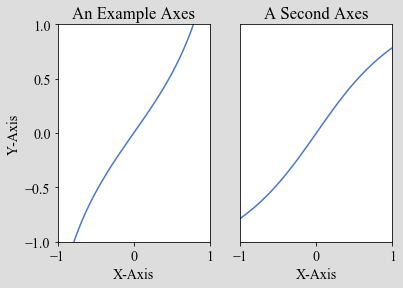

In [7]:
plt.gcf().set_facecolor('#DDDDDD')  # plt.gcf() points to current figure
plt.subplot(121)
plt.plot(x, y)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('An Example Axes')
plt.subplot(122)
plt.xlabel('X-Axis')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.yticks([])
plt.title('A Second Axes')
plt.plot(y, x);